<a href="https://colab.research.google.com/github/fbrunodev/Projeto_eu_registro/blob/main/Projeto_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim scikit-learn nltk #instalar a biblioteca scikit-learn
!pip install unidecode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
path = "/content/drive/MyDrive/Colab_EuRegistro/" #caminho para os arquivos

## Criação de arquivos modificados

In [ ]:
with open(path+'dump_processos.csv', 'r', encoding='utf-8') as f: #função para abrir o arquivo, com o encoding utf-8
    """
        Evitar erros de linhas contendo \" e \\"
        De \" para aspas simples, transformando \\" em \',
        e assim aplicando de \' para "
    """
    mod = f.read().replace('\\"', "'").replace("\\'", '"')

with open(path+'dump_processos_modificado.csv', 'w', encoding='utf-8') as f: #função para abrir o arquivo modificado
    """
        Escrever cópia modificada
    """
    f.write(mod)

## Análise do arquivo `dump_processos.csv`

#### Pré-processamento

In [ ]:
# O arquivo .csv usa "" para citações.
df_process= pd.read_csv(path+'dump_processos_modificado.csv', quotechar='"') # Lê o arquivo, interpretando aspas duplas (") como delimitadores de campos com texto

In [ ]:
# Células com o valor \N indicam um valor nulo
df_process.replace('\\N', np.nan, inplace=True) #Substitui todas as strings '\N' por valores nulos (NaN) no df

/tmp/ipython-input-4-587584727.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_process.replace('\\N', np.nan, inplace=True) #Substitui todas as strings '\N' por valores nulos (NaN) no df


In [ ]:
df_process.head()

,num_processo,dt_deposito,cnpj_cpf,marca,natureza,apresentacao,procurador,dt_vigencia,dt_concessao,dt_prorrogacao,apostila,prioridade_num,prioridade_data,prioridade_pais,arquivo,titular,marca_add,vetor_path
0,924554002,2021-10-08 00:00:00,NaN,Bala no Alvo,Produtos e/ou Serviço,Nominativa,luanna catelli vieira da silva,2033-01-03 00:00:00,2023-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,RM 2713.xml,NaN,1,NaN
1,924555670,2021-10-08 00:00:00,NaN,CERRITO,Produtos e/ou Serviço,Nominativa,"Ariboni, Fabbri e Schmidt Sociedade de Advogados",2033-01-03 00:00:00,2023-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,RM 2713.xml,NaN,0,NaN
2,925168238,2021-12-09 00:00:00,NaN,AB 1303,Produtos e/ou Serviço,Mista,BRUNO CORRÊA RIBEIRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 2730.xml,NaN,1,NaN
3,925123900,2021-12-05 00:00:00,NaN,SER GRANDE CONSULTORIA E CURSOS,Produtos e/ou Serviço,Mista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 2713.xml,NaN,0,NaN
4,924687053,2021-10-22 00:00:00,NaN,COMPANHIA DAS SOPAS,Produtos e/ou Serviço,Mista,Kelly Cristina de Souza,2033-01-03 00:00:00,2023-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,RM 2713.xml,NaN,0,NaN


In [ ]:
# Removendo colunas que devem ser ignoradas
df_process.drop(columns=['cnpj_cpf', 'arquivo', 'titular', 'apostila','dt_vigencia', 'vetor_path'], inplace=True)

In [ ]:
# Verificando e removendo colunas que contém apenas valores nulos
null_cols = [df_process.columns[idx] for idx, col in enumerate(df_process.isna().all()) if col] #Cria uma lista com os nomes das colunas que contêm apenas valores nulos (NaN)
print(f"Removendo colunas nulas: {null_cols}") #Exibe no console os nomes das colunas que serão removidas
df_process.drop(columns=null_cols, inplace=True) #Remove as colunas inteiramente nulas do df
df_process.head() #Exibe as primeiras linhas do df resultante


Removendo colunas nulas: ['dt_prorrogacao']


,num_processo,dt_deposito,marca,natureza,apresentacao,procurador,dt_concessao,prioridade_num,prioridade_data,prioridade_pais,marca_add
0,924554002,2021-10-08 00:00:00,Bala no Alvo,Produtos e/ou Serviço,Nominativa,luanna catelli vieira da silva,2023-01-03 00:00:00,NaN,NaN,NaN,1
1,924555670,2021-10-08 00:00:00,CERRITO,Produtos e/ou Serviço,Nominativa,"Ariboni, Fabbri e Schmidt Sociedade de Advogados",2023-01-03 00:00:00,NaN,NaN,NaN,0
2,925168238,2021-12-09 00:00:00,AB 1303,Produtos e/ou Serviço,Mista,BRUNO CORRÊA RIBEIRO,NaN,NaN,NaN,NaN,1
3,925123900,2021-12-05 00:00:00,SER GRANDE CONSULTORIA E CURSOS,Produtos e/ou Serviço,Mista,NaN,NaN,NaN,NaN,NaN,0
4,924687053,2021-10-22 00:00:00,COMPANHIA DAS SOPAS,Produtos e/ou Serviço,Mista,Kelly Cristina de Souza,2023-01-03 00:00:00,NaN,NaN,NaN,0


In [ ]:
df_process.drop_duplicates(inplace=True) #remove os valores duplicados

In [ ]:
#Lista de colunas com dados de texto (strings)
str_cols = ['marca', 'natureza', 'apresentacao', 'procurador', 'prioridade_pais']

In [ ]:
#converte todos os valores para letras minúsculas em str_cols (lowercase)
for col in str_cols:
  df_process[col] = df_process[col].str.lower()

In [ ]:
# Calcula o número de dias entre a data de concessão e a data de depósito
# Isso indica quanto tempo levou para a marca ser concedida após o pedido
df_process['tempo_ate_concessao'] = (
    pd.to_datetime(df_process['dt_concessao']) - pd.to_datetime(df_process['dt_deposito'])
).dt.days
# Remove a coluna original 'dt_concessao', pois os dados relevantes já foram extraídos
df_process.drop(columns=['dt_concessao'], inplace=True)

In [ ]:
date_cols = ['dt_deposito'] #Lista de colunas com dados de datas

In [ ]:
# Convertendo colunas de data para o formato YYYY-MM-DD
for col in date_cols:
    df_process[col] = pd.to_datetime(df_process[col], format='mixed', errors='coerce')  #Converte os valores da coluna para datetime, aceitando múltiplos formatos de data e transformando valores inválidos em NaT
    df_process[col] = pd.to_datetime(df_process[col].dt.strftime('%Y-%m-%d')) #Reaplica o formato de data como 'YYYY-MM-DD' após a conversão
df_process[date_cols] #Exibe apenas as colunas de datas já convertidas, para verificação

,dt_deposito
0,2021-10-08
1,2021-10-08
2,2021-12-09
3,2021-12-05
4,2021-10-22
...,...
4915934,2012-05-28
4915935,2012-12-28
4915938,2012-12-28
4915947,2000-09-25


In [ ]:
"""import pandas as pd
import numpy as np
import re
df_bi = pd.read_csv(path+'dump_processos_modificado.csv', quotechar='"')
df_bi.replace('\\N', np.nan, inplace=True)
df_bi.drop(columns=['cnpj_cpf', 'arquivo', 'titular', 'apostila','dt_vigencia', 'vetor_path'], inplace=True)
df_bi.drop(columns=[df_process.columns[idx] for idx, col in enumerate(df_process.isna().all()) if col], inplace=True)
df_bi.drop_duplicates(inplace=True)
str_cols = ['marca', 'natureza', 'apresentacao', 'procurador', 'prioridade_pais']
date_cols = ['dt_deposito', 'dt_concessao']
for col in date_cols:
    df_bi[col] = pd.to_datetime(df_bi[col], format='mixed', errors='coerce')
    df_bi[col] = pd.to_datetime(df_bi[col].dt.strftime('%Y-%m-%d'))

for col in str_cols:
  df_bi[col] = df_bi[col].str.lower()
excludentes = [
    '+', '?', '`', '|', '~', '*', '-', '/', '\\', "'", '#', '.', ',', ';',
    '(', ')', ']', '[', '%', '&', '´', '_', '"', '}', '{', '^', ':', '<',
    '>', '¨', '=', '–'
]
padrao = '[' + re.escape(''.join(excludentes)) + ']'
df_bi['marca_limpo'] = df_bi['marca'].replace(padrao, '', regex=True)
df_bi.to_csv(path+'dump_processos_BI.csv')"""

/tmp/ipython-input-19-1515829607.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bi.replace('\\N', np.nan, inplace=True)


In [ ]:
#Para cada coluna de data na lista date_cols
for col in date_cols:
    df_process[col+'_dia'] = df_process[col].dt.day #extrai o dia, mês e ano, criando novas colunas para cada componente
    df_process[col+'_mes'] = df_process[col].dt.month
    df_process[col+'_ano'] = df_process[col].dt.year
df_process.drop(columns=date_cols, inplace=True) #Remove as colunas originais de data, pois agora temos os componentes separados

In [ ]:
df_process['marca_add'].value_counts() #distribuição dos valores em cada classe de 'marca_add'

,count
marca_add,
0,1748319
1,139674


In [ ]:
df_process.head()

,num_processo,marca,natureza,apresentacao,procurador,apostila,prioridade_num,prioridade_pais,marca_add,tempo_ate_concessao,sem_concessao,dt_deposito_dia,dt_deposito_mes,dt_deposito_ano,prioridade_data_dia,prioridade_data_mes,prioridade_data_ano
0,924554002,ala no lvo,rodutos e ou ervico,ominativa,luanna catelli vieira da silva,,NaN,,1,452.0,0,8.0,10.0,2021.0,NaN,NaN,NaN
1,924555670,,rodutos e ou ervico,ominativa,"Ariboni, Fabbri e Schmidt Sociedade de Advogados",,NaN,,0,452.0,0,8.0,10.0,2021.0,NaN,NaN,NaN
2,925168238,1303,rodutos e ou ervico,ista,BRUNO CORRÊA RIBEIRO,,NaN,,1,NaN,1,9.0,12.0,2021.0,NaN,NaN,NaN
3,925123900,,rodutos e ou ervico,ista,NaN,,NaN,,0,NaN,1,5.0,12.0,2021.0,NaN,NaN,NaN
4,924687053,,rodutos e ou ervico,ista,Kelly Cristina de Souza,,NaN,,0,438.0,0,22.0,10.0,2021.0,NaN,NaN,NaN


In [ ]:

def preprocess_text(text):

    text = unidecode.unidecode(text)           # remover acentos
    text = re.sub(r"[^a-z0-9\s]", " ", text)   # remover pontuação
    text = re.sub(r"\s+", " ", text).strip()   # remover espaços extras
    return text

In [ ]:
# Preenche valores ausentes (NaN) na coluna 'marca' com string vazia ('')
# Em seguida, aplica a função preprocess_text para normalizar o texto (ex: minúsculas, remover acentos, etc.)

df_process['marca'] = df_process['marca'].fillna('').apply(preprocess_text)

df_process['apresentacao'] = df_process['apresentacao'].fillna('').apply(preprocess_text)

df_process['natureza'] = df_process['natureza'].fillna('').apply(preprocess_text)

df_process['prioridade_pais'] = df_process['prioridade_pais'].fillna('').apply(preprocess_text)


In [ ]:
df_process.head()

,num_processo,marca,natureza,apresentacao,procurador,apostila,prioridade_num,prioridade_pais,tempo_ate_concessao,sem_concessao,dt_deposito_dia,dt_deposito_mes,dt_deposito_ano,prioridade_data_dia,prioridade_data_mes,prioridade_data_ano,marca_add
0,924554002,bala no alvo,produtos e ou servico,nominativa,luanna catelli vieira da silva,,NaN,,452.0,0,8.0,10.0,2021.0,NaN,NaN,NaN,1
1,924555670,cerrito,produtos e ou servico,nominativa,"ariboni, fabbri e schmidt sociedade de advogados",,NaN,,452.0,0,8.0,10.0,2021.0,NaN,NaN,NaN,0
2,925168238,ab 1303,produtos e ou servico,mista,bruno corrêa ribeiro,,NaN,,NaN,1,9.0,12.0,2021.0,NaN,NaN,NaN,1
3,925123900,ser grande consultoria e cursos,produtos e ou servico,mista,NaN,,NaN,,NaN,1,5.0,12.0,2021.0,NaN,NaN,NaN,0
4,924687053,companhia das sopas,produtos e ou servico,mista,kelly cristina de souza,,NaN,,438.0,0,22.0,10.0,2021.0,NaN,NaN,NaN,0


In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
X = df_process.drop(columns=['marca_add']) #definindo x
y = df_process['marca_add'] #definindo y
print("Distribuição original:", Counter(y))

# Oversampling da classe minoritária (classe 1)
oversampler = RandomOverSampler(sampling_strategy='auto')
X_res, y_res = oversampler.fit_resample(X, y)

print("Distribuição após oversampling:", Counter(y_res))
df_process = pd.concat([X_res, y_res], axis=1)

Distribuição original: Counter({0: 1748319, 1: 139674})
Distribuição após oversampling: Counter({1: 1748319, 0: 1748319})


#### Aplicando modelos

In [ ]:
df_model = df_process.drop(columns=['num_processo','prioridade_pais','procurador','prioridade_data', 'prioridade_num']) #remove colunas irrelevantes

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
nltk.download("stopwords") #baixa lista de stopwords
nltk.download("rslp") #baixa algoritmo de stemming
nltk.download("punkt_tab") #baixa um tokenizador pré-treinado

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = list(stopwords.words("portuguese")) #cria uma lista de stopwords em português

stop_words.remove("não") #remove a palavra 'não' da lista de stopwords

In [ ]:
#Importando bibliotecas necessárias para criação de modelo de classificação
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline

from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
# Aplica tokenização na coluna 'marca', transformando cada string em uma lista de palavras (tokens)
df_model['marca_tokens'] = df_model['marca'].apply(word_tokenize)

# Converte a coluna 'marca_tokens' em uma lista de listas de tokens, que é o formato esperado pelo Word2Vec
all_tokens = df_model['marca_tokens'].tolist()

# Treina um modelo Word2Vec com os tokens das marcas
w2v_model = Word2Vec(
    sentences=all_tokens,  # lista de listas de palavras (tokens)
    vector_size=100,       # tamanho dos vetores de embedding (dimensão do vetor de cada palavra)
    window=2,              # janela de contexto: quantas palavras antes/depois considerar
    min_count=1            # inclui palavras que aparecem pelo menos uma vez (sem filtro de frequência)
)


In [ ]:
# Classe personalizada que transforma uma coluna de tokens em embeddings médios usando Word2Vec
class ColumnEmbeddingTransformer(BaseEstimator, TransformerMixin):

    # Inicializa com o nome da coluna a ser transformada e o modelo Word2Vec pré-treinado
    def __init__(self, column_name, w2v_model):
        self.column_name = column_name  # nome da coluna de tokens (ex: "marca_tokens")
        self.w2v_model = w2v_model      # modelo Word2Vec treinado
        self.vector_size = w2v_model.vector_size  # tamanho dos vetores do Word2Vec

    # Método obrigatório, mas não faz nada no fit (porque não aprende nada com os dados nesse caso)
    def fit(self, X, y=None):
        return self

    # Transforma a coluna de tokens em vetores de embedding médios
    def transform(self, X):
        vectors = []

        # Itera sobre cada linha da coluna de tokens
        for tokens in X[self.column_name]:
            # Remove stopwords
            filtered = [word for word in tokens if word not in stop_words]

            # Pega os vetores apenas das palavras que existem no vocabulário do Word2Vec
            vecs = [self.w2v_model.wv[word] for word in tokens if word in self.w2v_model.wv]

            # Se houver vetores válidos, tira a média; senão, retorna vetor nulo
            if vecs:
                vectors.append(np.mean(vecs, axis=0))
            else:
                vectors.append(np.zros(self.vector_size))

        # Retorna um array 2D com os vetores para todas as linhas
        return np.array(vectors)


In [ ]:
# Lista com as colunas categóricas que serão codificadas
categorical_features = ['apresentacao', 'natureza']

# Lista com as colunas numéricas que precisarão de imputação e normalização
numeric_features = ['tempo_ate_concessao', 'dt_deposito_ano', 'dt_deposito_mes']

# Cria um pipeline para colunas numéricas:
# Preenche valores ausentes com a mediana
# Aplica padronização
date_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Cria um ColumnTransformer que aplica:

preprocessor = ColumnTransformer(transformers=[
    ("marca_vec", ColumnEmbeddingTransformer("marca_tokens", w2v_model), ["marca_tokens"]), # Word2Vec na coluna 'marca_tokens' usando um transformador customizado
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features), # OneHotEncoder nas colunas categóricas da lista categorical_features
    ('num', date_transformer, numeric_features) # Pipeline numérico nas colunas numéricas
], remainder='drop') # Descarta outras colunas não especificadas

# Pipeline final:
# Aplica o pré-processamento
# Treina um modelo RandomForest com 250 árvores, com pesos balanceados para classes desbalanceadas
pipeline = Pipeline([
    ('preprocessor', preprocessor),
     ('clf', RandomForestClassifier(
        n_estimators=250,           # número de árvores na floresta
        class_weight='balanced',    # ajusta o peso das classes proporcionalmente à frequência
        n_jobs=1                    # usa 1 núcleo de CPU
    ))
])

In [ ]:
df_sample, _ = train_test_split(df_model, train_size=100_000, stratify=df_model['marca_add'], random_state=42)

In [ ]:
df_sample.head()

,marca,natureza,apresentacao,tempo_ate_concessao,dt_deposito_dia,dt_deposito_mes,dt_deposito_ano,marca_add,marca_tokens
1648245,restrana,de produto,nominativa,879.0,7.0,11.0,2014.0,0,[restrana]
1319180,ora thiago,produtos e ou servico,nominativa,NaN,21.0,5.0,2024.0,0,"[ora, thiago]"
2460842,amanda bolos e cia,produtos e ou servico,mista,419.0,26.0,1.0,2022.0,1,"[amanda, bolos, e, cia]"
1239209,malu transportes,produtos e ou servico,mista,NaN,5.0,4.0,2024.0,0,"[malu, transportes]"
1091492,grupo dobem,produtos e ou servico,mista,300.0,7.0,10.0,2020.0,0,"[grupo, dobem]"


In [ ]:
X =df_sample.drop(columns=['marca_add']) #Define as variáveis independentes (features) removendo a coluna 'marca_add' do df
y = df_sample['marca_add'] #Define a variável dependente (target) como a coluna 'marca_add'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Divide os dados em conjuntos de treino e teste, reservando 30% dos dados para teste e usando random_state para reprodutibilidade


#### Treinando o modelo e aplicando métricas

In [ ]:
model = pipeline.fit(X_train, y_train)

In [ ]:

y_pred = model.predict(X_test)
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     14927
           1       0.82      0.81      0.82     15073

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred) # Calcula a matriz de confusão com os rótulos reais e os rótulos previstos
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Cria o objeto gráfico com a matriz calculada
disp.plot(cmap="Blues") # Plota a matriz com um mapa de cores azul
plt.title("Matriz de Confusão") # Define o título do gráfico
plt.show() # Exibe o gráfico


NameError: name 'y_test' is not defined

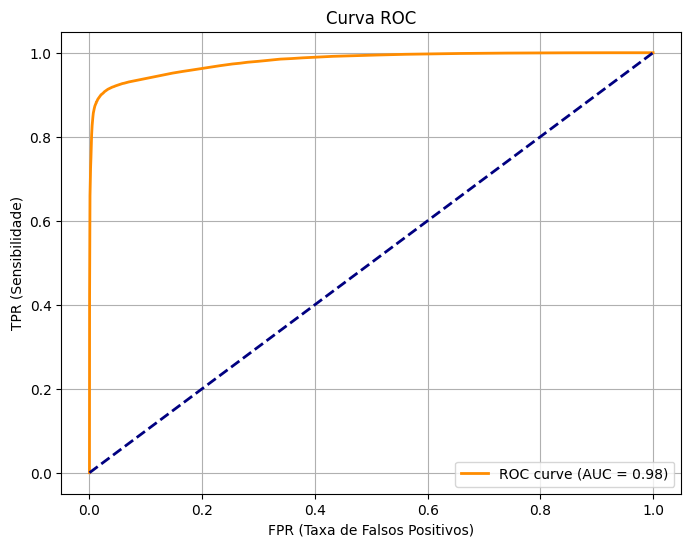

In [ ]:
# Verifica se o problema é de classificação binária (ou seja, se há apenas duas classes)
if len(model.classes_) == 2:
    # Calcula as probabilidades previstas para a classe positiva (classe 1)
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calcula os pontos da curva ROC:
    # - fpr: taxa de falsos positivos (False Positive Rate)
    # - tpr: taxa de verdadeiros positivos (True Positive Rate, ou Sensibilidade)
    # - thresholds: limiares usados para classificar como positivo ou negativo
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Calcula a área sob a curva ROC (AUC - quanto maior, melhor o modelo)
    roc_auc = auc(fpr, tpr)

    # Exibe a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

    # Linha de referência (classificador aleatório)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Ajusta o gráfico com rótulos, título, legenda e grade
    plt.xlabel('FPR (Taxa de Falsos Positivos)')
    plt.ylabel('TPR (Sensibilidade)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
   # Caso o problema não seja binário, exibe uma mensagem informativa
    print("Curva ROC só é aplicável para classificação binária.")


In [ ]:
# Gráfico: Distribuição das Classes (variável alvo)
# Mostra a quantidade de amostras em cada classe da variável de saída.
# Ajuda a identificar se há desbalanceamento de classes no dataset.

sns.countplot(x=y, palette="Set2")
plt.title("Distribuição das Classes em y (marca_add)")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análise do arquivo `dump_processos_despacho.csv`

In [ ]:
def is_valid_line(line):
    return line.count('"') % 2 == 0 #verifica se uma linha de texto possui um número par de aspas, para saber se a linha é válida

In [ ]:
#Corrigindo aspas escapadas e removendo linhas com aspas desequilibradas e armazenando em outro arquivo .csv
#Abre dois arquivos ao mesmo tempo usando o contexto "with":
with (open(path+'dump_processos_despacho.csv', 'r', encoding='utf-8') as infile, # - Um arquivo CSV original para leitura ('r')
     open(path+'dump_processos_despacho_modificado.csv', 'w', encoding='utf-8') as outfile): # - Um novo arquivo CSV para escrita ('w')

    for line in infile: #Itera sobre cada linha do arquivo de entrada
        line = line.replace('\\"', '""') #Substitui aspas escapadas \" por aspas duplas padrão ""

        #Verifica se a linha tem um número par de aspas, o que indica que está bem formatada
        if is_valid_line(line):
            #Se válida, escreve a linha no novo arquivo
            outfile.write(line)
        else:
            #Se inválida, exibe parte da linha ignorada no terminal para análise posterior
            print(f"Linha ignorada: {line.strip()[:100]}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_EuRegistro/dump_processos_despacho.csv'

In [ ]:
# Lendo o arquivo .cvs que foi modificado
df_despacho = pd.read_csv(path+'dump_processos_despacho_modificado.csv', quotechar='"')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_EuRegistro/dump_processos_despacho_modificado.csv'

In [ ]:
# Inspecionando as colunas do arquivo .csv
df_despacho.info()

NameError: name 'df_despacho' is not defined

In [ ]:
# Atribuindo a nomenclatura das colunas de acordo com a entidade da base de dados
df_despacho.columns = ['id_despacho', 'num_processo', 'num_despacho','rpi', 'dt_rpi', 'desc_despacho']

In [ ]:
# Há células com o valor \N referindo-se a dados nulos, então a linha a seguir vamos substituí-los para NaN
df_despacho = df_despacho.replace('\\N', np.nan)

In [ ]:
# Verificando a quantidade de dados nulos no dataframe
df_despacho.isnull().sum()

,0
id_despacho,0
num_processo,0
num_despacho,0
rpi,0
dt_rpi,0
desc_despacho,3698991


In [ ]:
# Como há a predominâmcia de dados nulos na coluna desc_despacho, vamos eliminá-las e consequentemente remover também a duplicidade de dados cajo haja alguma
df_despacho = df_despacho.dropna(subset=['desc_despacho']) #removendo nulos
df_despacho = df_despacho.drop_duplicates() #removendo duplicatas

In [ ]:
# Convertendo a data para datetime
df_despacho['dt_rpi'] = pd.to_datetime(df_despacho['dt_rpi'], errors='coerce')

In [ ]:
# Padronizando todas as letras da coluna des_despacho para lower(minúsculas)
df_despacho['desc_despacho'] = df_despacho['desc_despacho'].str.lower()

In [ ]:
df_despacho.head()

,id_despacho,num_processo,num_despacho,rpi,dt_rpi,desc_despacho
3,9486118,925123900,i024,2713,2023-01-03,"a marca reproduz ou imita os seguintes registros de terceiros, sendo, portanto, irregistrável de acordo com o inciso xix do art. 124 da lpi: processo 917066960 (a arte de ser grande). art. 124 - não são registráveis como marca: xix - reprodução ou imitação, no todo ou em parte, ainda que com acréscimo, de marca alheia registrada, para distinguir ou certificar produto ou serviço idêntico, semelhante ou afim, suscetível de causar confusão ou associação com marca alheia;"
17,9486132,925064890,i024,2713,2023-01-03,"a marca reproduz ou imita os seguintes registros de terceiros, sendo, portanto, irregistrável de acordo com o inciso xix do art. 124 da lpi: processo 909211361 (cubo coworking itaú), processo 913390895 (cubo itaú) e processo 919104789 (cubo contábil). art. 124 - não são registráveis como marca: xix - reprodução ou imitação, no todo ou em parte, ainda que com acréscimo, de marca alheia registrada, para distinguir ou certificar produto ou serviço idêntico, semelhante ou afim, suscetível de causar confusão ou associação com marca alheia;"
37,9486152,925173487,i024,2713,2023-01-03,"a marca é constituida por concept liss professional sem suficiente forma distintiva, irregistrável de acordo com o inciso vi do art 124 da lpi. art. 124 - não são registráveis como marca: vi - sinal de caráter genérico, necessário, comum, vulgar ou simplesmente descritivo, quando tiver relação com o produto ou serviço a distinguir, ou aquele empregado comumente para designar uma característica do produto ou serviço , quanto à natureza, nacionalidade, peso, valor, qualidade e época de produção ou de prestação do serviço, salvo quando revestidos de suficiente forma distintiva;"
41,9486156,925060712,i024,2713,2023-01-03,"a marca reproduz ou imita os seguintes registros de terceiros, sendo, portanto, irregistrável de acordo com o inciso xix do art. 124 da lpi: processo 909856095 (clinart fisioterapia) e processo 823263304 (clinic art odontologia). art. 124 - não são registráveis como marca: xix - reprodução ou imitação, no todo ou em parte, ainda que com acréscimo, de marca alheia registrada, para distinguir ou certificar produto ou serviço idêntico, semelhante ou afim, suscetível de causar confusão ou associação com marca alheia;"
45,9486160,925124192,i024,2713,2023-01-03,"a marca reproduz ou imita os seguintes registros de terceiros, sendo, portanto, irregistrável de acordo com o inciso xix do art. 124 da lpi: processo 910583145 (unep promotora). art. 124 - não são registráveis como marca: xix - reprodução ou imitação, no todo ou em parte, ainda que com acréscimo, de marca alheia registrada, para distinguir ou certificar produto ou serviço idêntico, semelhante ou afim, suscetível de causar confusão ou associação com marca alheia;"


In [ ]:
# Acrescentando duas colunas derivadas de dt_rpi, para análises futuras
df_despacho['ano_rpi'] = df_despacho['dt_rpi'].dt.year #Extrai o ano da coluna 'dt_rpi' e cria uma nova coluna 'ano_rpi' com esse valor
df_despacho['mes_rpi'] = df_despacho['dt_rpi'].dt.month #Extrai o mês da coluna 'dt_rpi' e cria uma nova coluna 'mes_rpi' com esse valor

## Análise do arquivo `conclusoes_parecer.csv`

In [ ]:
#analisar o arquivo conclusoes_parecer.csv
df_conclusoes = pd.read_csv(path+"conclusoes_parecer.csv", encoding="utf-8", sep=',', on_bad_lines='skip') #Usa codificação UTF-8, separador vírgula e ignora linhas com erros de formatação

#Ajuste de opções de exibição, para mostrar todos os dados sem abreviação
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [ ]:
#Mostra o df
print("Exemplo de dados:\n", df_conclusoes, '\n')

#Tamanho do arquivo
print("Número total de linhas:", len(df_conclusoes))
print("Colunas:", list(df_conclusoes.columns), '\n')

Exemplo de dados:
     id_conclusao  \
0              1   
1              2   
2              3   
3              4   
4              5   
5              6   
6              7   
7              8   
8              9   
9             10   
10            11   
11            12   
12            13   
13            14   
14            15   
15            16   
16            17   
17            18   
18            19   
19            20   
20            21   
21            22   
22            23   
23            24   
24            25   
25            26   
26            27   
27            29   
28            30   
29            31   
30            33   

                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
#Verifica valores ausentes
print("Valores ausentes por coluna:\n", df_conclusoes.isnull().sum(), '\n')

#Verifica tipos únicos de id_conclusao
print("Exemplos de IDs únicos:", df_conclusoes['id_conclusao'].dropna().unique(), '\n')

Valores ausentes por coluna:
 id_conclusao     0
conclusao        0
nota            18
dtype: int64 

Exemplos de IDs únicos: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29 30 31 33] 



In [ ]:
#Pareceres com nota vazia
nota_vazia = df_conclusoes[df_conclusoes['nota'].isnull()]
print("Total de pareceres SEM nota:", len(nota_vazia), '\n')

Total de pareceres SEM nota: 18 



In [ ]:
#IDs ausentes (ex: pulou do 24 pro 26)
ids = pd.to_numeric(df_conclusoes['id_conclusao'], errors='coerce').dropna().astype(int)
ids_ordenados = sorted(ids)
ids_pulos = [i for i in range(min(ids_ordenados), max(ids_ordenados)) if i not in ids_ordenados]
print("IDs que foram pulados:", ids_pulos, '\n')

IDs que foram pulados: [28, 32] 



In [ ]:
#Amostra de incisos (se contiverem "Inciso")
frase_errada = "Inciso VI - sinal de carÃ¡ter genÃ©rico, necessÃ¡rio, comum, vulgar ou simplesmente descritivo, quando tiver relaÃ§Ã£o com o produto ou serviÃ§o a distinguir, ou aquele empregado comumente para designar uma caracterÃ­stica do produto ou serviÃ§o, quanto Ã  natureza, nacionalidade, peso, valor, qualidade e Ã©poca de produÃ§Ã£o ou de prestaÃ§Ã£o do serviÃ§o, salvo quando revestidos de suficiente forma distintiva."
#corrige o inciso, que não foi decodificado corretamente
frase_certa = frase_errada.encode('latin1').decode('utf-8')
print(frase_certa)

#Observações (linha com id vazio ou campo conclusao sem número, pode variar)
observacoes = df_conclusoes[df_conclusoes['id_conclusao'].isnull()]
print("Exemplo de observação:\n", observacoes.head(1), '\n')

Inciso VI - sinal de caráter genérico, necessário, comum, vulgar ou simplesmente descritivo, quando tiver relação com o produto ou serviço a distinguir, ou aquele empregado comumente para designar uma característica do produto ou serviço, quanto à natureza, nacionalidade, peso, valor, qualidade e época de produção ou de prestação do serviço, salvo quando revestidos de suficiente forma distintiva.


NameError: name 'df_conclusoes' is not defined